# Blue Book for Bulldozers

Subhankar Halder

# Objective

The objective of this project is to predict the sale price of a heavy equipment bulldozer in an auction. Specificallly, we would be looking at the RMSLE (Root Mean Squared Log Error) between the actual and predicted auction sale prices. We would try to predict the values using Random Forests. The source of the data is [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data).  

## Import Libraries

We import the relevant libraries to conduct analysis on our project. 

In [1]:
# Import Pandas

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

# Import Numpy 

import numpy as np

# Import Scikit Learn Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

# Import Seaborn and Matplotlib

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Import Re

import re

# Import Math

import math

# Import train_test_split

from sklearn.model_selection import train_test_split


## Load Data

We load the data into a Pandas DataFrame and then see how it looks. 

In [2]:
df = pd.read_csv("Train.csv", low_memory = False, parse_dates = True)

In [3]:
#Explore the data using the head command

df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Explore the data using the tail command

df.tail(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,6333342,7750,1926965,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [5]:
# Explore the DataFrame using the info command

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

We note that there are 53 columns. In this project we would investigate all the 53 columns and conduct feature engineering if required. 

## Column Investigation and Feature Engineering

### 1. Sales ID 



In [6]:
# Sales ID

df['SalesID'].head(5)

0    1139246
1    1139248
2    1139249
3    1139251
4    1139253
Name: SalesID, dtype: int64

In [7]:
# Sales ID

df['SalesID'].tail(5)

401120    6333336
401121    6333337
401122    6333338
401123    6333341
401124    6333342
Name: SalesID, dtype: int64

In [8]:
# Look for duplicates 

df['SalesID'].duplicated().any()

False

### 2. SalePrice

We replace sale price with log of sale price as the evaluation of the model would be done on the basis of RMSLE. 

In [9]:
# Change Sale Price to Log of Sale Price

df['SalePrice']= np.log(df['SalePrice'])

In [10]:
# Check summary statistics of Sale Price

df['SalePrice'].describe()

count    401125.000000
mean         10.103096
std           0.693621
min           8.465900
25%           9.581904
50%          10.085809
75%          10.596635
max          11.863582
Name: SalePrice, dtype: float64

(array([ 33879., 113273., 137721.,  85845.,  30407.]),
 array([ 8.4658999 ,  9.14543638,  9.82497287, 10.50450936, 11.18404585,
        11.86358234]),
 <a list of 5 Patch objects>)

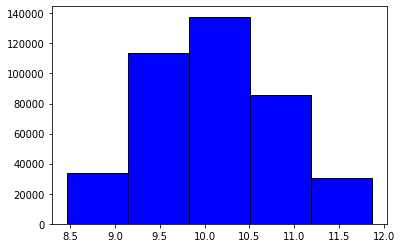

In [11]:
# Check histogram to spot any anomalies in the data of Sale Price

plt.hist(df['SalePrice'],color = 'blue', edgecolor = 'black',bins = 5)

This looks like a normal curve. 

### 3. MachineID

In [12]:
# Check for duplicates

df['MachineID'].duplicated().any()

True

In [13]:
# Investigate the duplicates

df.loc[df['MachineID'].duplicated() == True]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
784,1141815,9.210340,157544,7009,121,3.0,1999,1257.0,Low,1/12/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,1144859,11.626254,8912,23926,121,3.0,2000,4442.0,High,5/20/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,1146216,9.047821,1045793,6270,121,3.0,2000,496.0,Low,7/28/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,1146491,9.210340,1023901,5282,121,3.0,1990,4758.0,Medium,7/16/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Straight,2 Pedal,NaN,NaN
2372,1147187,11.251561,895745,1636,121,3.0,1999,8218.0,Medium,6/15/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,Differential Steer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401033,6328141,9.615805,1842820,20103,149,99.0,2003,NaN,NaN,8/4/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401051,6328442,9.798127,1523948,10917,149,1.0,1996,NaN,NaN,10/26/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
401064,6332596,10.308953,1892067,20998,149,1.0,2006,NaN,NaN,12/8/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401065,6332597,9.546813,1887905,20995,149,1.0,1998,NaN,NaN,10/18/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


We note that there are 60098 rows that have duplicate Machine ID

### 4. ModelID


In [14]:
# Check for duplicates

df['ModelID'].duplicated().any()

True

In [15]:
# Investigate the duplicates

df.loc[df['ModelID'].duplicated()]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
10,1139278,10.085809,1024998,4605,121,3.0,2004,1414.0,Medium,8/21/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1139344,10.165852,1044500,7040,121,3.0,2005,109.0,Low,10/25/2007 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
24,1139348,10.404263,294562,3542,121,3.0,2001,1877.0,Medium,5/20/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1139351,9.433484,833838,7009,121,3.0,2003,1028.0,Medium,3/9/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1139354,9.648595,565440,7040,121,3.0,2003,356.0,Low,3/9/2006 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


According to our analysis, all modelID to not map equally to the Machine ID. If so, we would have the same number of duplicates. 

### 5. datasource

In [16]:
# Check how this column looks like

df['datasource'].head(10)


0    121
1    121
2    121
3    121
4    121
5    121
6    121
7    121
8    121
9    121
Name: datasource, dtype: int64

In [17]:
# Check the statistics on these numbers

df['datasource'].describe()

count    401125.000000
mean        134.665810
std           8.962237
min         121.000000
25%         132.000000
50%         132.000000
75%         136.000000
max         172.000000
Name: datasource, dtype: float64

(array([ 23979., 336243.,  26304.,      0.,  14599.]),
 array([121. , 131.2, 141.4, 151.6, 161.8, 172. ]),
 <a list of 5 Patch objects>)

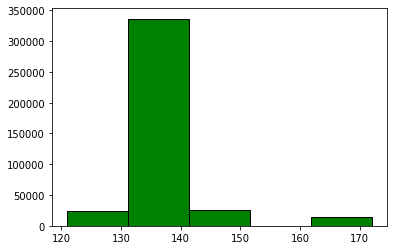

In [18]:
# Check the distrbution of the datasource

plt.hist(df['datasource'], color = 'green', edgecolor = 'black', bins = 5)

In [19]:
# Investigate the rows that have the spike in data source as noted in the graph above

df.loc[(df['datasource'] >= 131) & (df['datasource'] <= 142)].describe()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,3.362430e+05,336243.000000,3.362430e+05,336243.000000,336243.000000,316107.000000,336243.000000,8.665900e+04
mean,1.717240e+06,10.095546,1.205631e+06,6539.789857,132.898053,6.822228,1898.492299,2.937093e+03
std,3.580411e+05,0.688302,3.928232e+05,5808.268014,1.669048,17.091907,290.873901,3.499432e+04
min,1.235885e+06,8.465900,0.000000e+00,28.000000,132.000000,1.000000,1000.000000,0.000000e+00
25%,1.438370e+06,9.581904,1.120932e+06,3243.000000,132.000000,1.000000,1983.000000,0.000000e+00
50%,1.629083e+06,10.085809,1.287738e+06,4604.000000,132.000000,2.000000,1994.000000,0.000000e+00
75%,1.826986e+06,10.571317,1.452690e+06,8089.000000,132.000000,5.000000,1999.000000,1.045000e+03
max,4.512363e+06,11.863582,2.386412e+06,37198.000000,136.000000,99.000000,2012.000000,2.483300e+06


It seems most of the data source is from 132.

### 6. AuctioneerID

In [20]:
# Check for nulls

df['auctioneerID'].isnull().any()


True

In [21]:
# Check how many nulls

df['auctioneerID'].isnull().sum()

20136

In [22]:
# Check stats for this column

df['auctioneerID'].describe()

count    380989.000000
mean          6.556040
std          16.976779
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          99.000000
Name: auctioneerID, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([357991.,  11592.,      0.,      0.,  11406.]),
 array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ]),
 <a list of 5 Patch objects>)

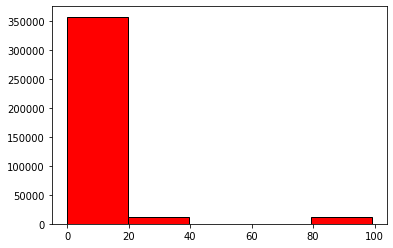

In [23]:
# Check distribution for this column

plt.hist(df['auctioneerID'],color = 'red', edgecolor = 'black', bins = 5)

In [24]:
# Check the median of this column

df['auctioneerID'].median()

2.0

In [25]:
# The number of nulls are high for them to be thrown away
# We replace the nulls with the median value

df['auctioneerID'].fillna(df['auctioneerID'].median(), inplace = True)
df['auctioneerID'].isnull().any()

False

### 7. Year Made

In [26]:
# Get stats about Year Made

df['YearMade'].describe()

count    401125.000000
mean       1899.156901
std         291.797469
min        1000.000000
25%        1985.000000
50%        1995.000000
75%        2000.000000
max        2013.000000
Name: YearMade, dtype: float64

(array([ 38185.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,    610., 362330.]),
 array([1000.  , 1050.65, 1101.3 , 1151.95, 1202.6 , 1253.25, 1303.9 ,
        1354.55, 1405.2 , 1455.85, 1506.5 , 1557.15, 1607.8 , 1658.45,
        1709.1 , 1759.75, 1810.4 , 1861.05, 1911.7 , 1962.35, 2013.  ]),
 <a list of 20 Patch objects>)

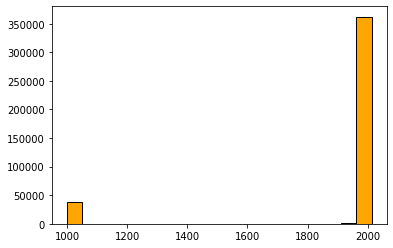

In [27]:
# Minimum of the column seems wrong. Let's check the distribution

plt.hist(df['YearMade'], color = 'orange', edgecolor = 'black', bins = 20)

In [28]:
# Investigate the years before 1980 values 

df.loc[(df['YearMade'] == 1000)]


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
21,1139333,10.448715,999192,3350,121,3.0,1000,16328.0,Medium,10/19/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1139369,9.546813,1050658,1918,121,3.0,1000,0.0,NaN,1/28/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
35,1139382,9.210340,1068548,112,121,3.0,1000,3981.0,Low,6/9/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
36,1139390,9.017968,1011114,7110,121,3.0,1000,0.0,NaN,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401066,6332598,9.546813,1797445,20995,149,1.0,1000,NaN,NaN,6/23/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401069,6332803,10.532096,1864798,20998,149,2.0,1000,NaN,NaN,9/16/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401072,6333184,9.305651,1929774,21436,149,1.0,1000,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401073,6333196,9.210340,1926563,21435,149,1.0,1000,NaN,NaN,12/14/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


Some of these values do not make sense. How are these made in 1000? How do that have a sale date of 2011? We pinpoint the when the Year Made years seems realistic.

In [29]:
# After a bit of experimentation we figure out that there are 38185 rows before the year 1919.

df.loc[df['YearMade']< 1919]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
21,1139333,10.448715,999192,3350,121,3.0,1000,16328.0,Medium,10/19/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1139369,9.546813,1050658,1918,121,3.0,1000,0.0,NaN,1/28/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
35,1139382,9.210340,1068548,112,121,3.0,1000,3981.0,Low,6/9/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
36,1139390,9.017968,1011114,7110,121,3.0,1000,0.0,NaN,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401066,6332598,9.546813,1797445,20995,149,1.0,1000,NaN,NaN,6/23/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401069,6332803,10.532096,1864798,20998,149,2.0,1000,NaN,NaN,9/16/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401072,6333184,9.305651,1929774,21436,149,1.0,1000,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401073,6333196,9.210340,1926563,21435,149,1.0,1000,NaN,NaN,12/14/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [30]:
# We replace all the rows before 1929 with the median


df['YearMade'].where(df['YearMade'] > 1918, df['YearMade'].median(), inplace = True)
df['YearMade'].describe()

count    401125.000000
mean       1993.875692
std           9.218973
min        1919.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2013.000000
Name: YearMade, dtype: float64

### 8. MachineHoursCurrentMeter

In [31]:
# Check Nulls

df['MachineHoursCurrentMeter'].isnull().sum()

258360

In [32]:
# Check Stats on this column

df['MachineHoursCurrentMeter'].describe()

count    1.427650e+05
mean     3.457955e+03
std      2.759026e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.025000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

In [33]:
# Check Median

df['MachineHoursCurrentMeter'].median()

0.0

In [34]:
# Replace null with Median

df['MachineHoursCurrentMeter'].fillna(df['MachineHoursCurrentMeter'].median(), inplace = True)
df['MachineHoursCurrentMeter'].isnull().sum()


0

### 9. Sale Date

In [35]:
# For SaleDate we split the column into various possible columns such as Year, Month, Day etc.
# We use fast.ai add_datepart function to do the splitting

def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)
        
add_datepart(df, 'saledate')

In [36]:
# Check whether the date column has been split
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                401125 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    401125 non-null float64
UsageBand                   69639 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       401125 non-null object
ProductGroup               

### 10. fiProductClassDesc

In [37]:
# Check Columns

df['fiProductClassDesc'].head(10)

0             Wheel Loader - 110.0 to 120.0 Horsepower
1             Wheel Loader - 150.0 to 175.0 Horsepower
2    Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...
3    Hydraulic Excavator, Track - 12.0 to 14.0 Metr...
4    Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
5    Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...
6    Hydraulic Excavator, Track - 21.0 to 24.0 Metr...
7    Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...
8    Hydraulic Excavator, Track - 3.0 to 4.0 Metric...
9             Wheel Loader - 350.0 to 500.0 Horsepower
Name: fiProductClassDesc, dtype: object

In [38]:
# We split the column into two columns seperated by the delimiter - 

df['fiProductClassDesc1'], df['fiProductClassDesc2'] = df['fiProductClassDesc'].str.split('-', 1).str
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 67 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                401125 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    401125 non-null float64
UsageBand                   69639 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       401125 non-null object
ProductGroup               

In [39]:
# Drop the original column as the info is now in the two other columns

df.drop(['fiProductClassDesc'], axis=1, inplace = True)

# Check if the change has taken place

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 66 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                401125 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    401125 non-null float64
UsageBand                   69639 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
state                       401125 non-null object
ProductGroup                401125 non-null object
ProductGroupDesc           

We replace all the string type to category. Further, we replace the replace NaN values with the mode and then convert categories to numeric codes. 

In [40]:
# Convert String Columns to Category
# Replace NaN with Mode

for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            if df[n].isnull().any() == True:
                df[n] = df[n].fillna(df[n].mode()[0])

# Convert categories into numeric codes
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

# Check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 7691 entries, SalesID to fiProductClassDesc2_ Unidentified (Compact Construction)
dtypes: bool(6), float64(3), int64(12), uint8(7670)
memory usage: 2.9 GB


# Modeling

We are done with looking at the column data. We now turn towards modeling and predictive algorithms. We, first, create functions to calculate RMSE and split data into train, and test data. Then,we split the dataset into 

In [41]:
# Calculate RMSE 

def rmse(x,y):
    return np.sqrt(((x-y)^2).mean())


# Split data into Train and Test Data

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)





    

### Model 1

We start with our first Random Forest: 

In [42]:
# Random Forest Model 1

random_forest_1 = RandomForestRegressor(n_jobs = -1)
%time random_forest_1.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 18min 7s, sys: 18.6 s, total: 18min 25s
Wall time: 4min 39s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [43]:
%time y_pred = random_forest_1.predict(X_test)



CPU times: user 2min 27s, sys: 28.8 s, total: 2min 55s
Wall time: 2min 52s


In [44]:
print(y_pred)

[ 9.95228022 10.30761202  9.20150159 ... 10.02503528  9.68823608
  9.55175408]


In [45]:
print(y_test)

175438    10.085809
5054      10.404263
264034     9.259131
351477    10.341742
246436     9.239899
            ...    
216011    10.021271
125686    10.325482
115519     9.952278
299036     9.648595
171420     9.546813
Name: SalePrice, Length: 320900, dtype: float64


In [66]:

print(np.sqrt(np.mean((y_pred-y_test.values)**2)))

0.19252412825901064


### Model 2

We try a single tree Random Forest

In [96]:
#Random Forest Model 2

random_forest_2 = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time random_forest_2.fit(X_train, y_train)

CPU times: user 2min 1s, sys: 18.8 s, total: 2min 20s
Wall time: 2min 20s


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [97]:
%time y_pred = random_forest_2.predict(X_test)
print(np.sqrt(np.mean((y_pred-y_test.values)**2)))

CPU times: user 2min 29s, sys: 29.6 s, total: 2min 58s
Wall time: 2min 58s
0.5277485360244836


We note that the RMSE incresed when we had just 1 tree.


### Model 3

In [98]:
#Random Forest Model 3

random_forest_3 = RandomForestRegressor(n_estimators=20, n_jobs=-1)
%time random_forest_3.fit(X_train, y_train)

CPU times: user 37min 15s, sys: 19.5 s, total: 37min 35s
Wall time: 6min 53s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [99]:
%time y_pred = random_forest_3.predict(X_test)
print(np.sqrt(np.mean((y_pred-y_test.values)**2)))

CPU times: user 2min 34s, sys: 29.5 s, total: 3min 4s
Wall time: 2min 57s
0.18659222042003884


This error is lower than Model 1


### Model 4

In [100]:
#Random Forest Model 4

random_forest_4 = RandomForestRegressor(n_estimators=15, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time random_forest_4.fit(X_train, y_train)

CPU times: user 19min 43s, sys: 27 s, total: 20min 10s
Wall time: 5min 42s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [101]:
%time y_pred = random_forest_4.predict(X_test)
print(np.sqrt(np.mean((y_pred-y_test.values)**2)))

CPU times: user 2min 30s, sys: 29.8 s, total: 3min
Wall time: 2min 56s
0.19701825043209537


We note that Model 3 was better if we consider RMSE

## Feature Importance

We'll look into the Feature Importance of Model 3. 

In [105]:

values = sorted(zip(X_train.columns, random_forest_3.feature_importances_), key=lambda x: x[1] * -1)
print(values)

[('Enclosure_EROPS w AC', 0.21416434140748147), ('YearMade', 0.12268874925727755), ('ModelID', 0.08942489988637672), ('saleElapsed', 0.0668945422281837), ('ProductGroupDesc_Skid Steer Loaders', 0.0602839377069321), ('fiProductClassDesc1_Skid Steer Loader ', 0.05177495464221169), ('SalesID', 0.04070470293688464), ('ProductGroup_SSL', 0.03626510833924319), ('ProductSize_Mini', 0.035735055000192216), ('fiProductClassDesc2_ 14.0 to 15.0 Ft Standard Digging Depth', 0.01517498740954413), ('fiProductClassDesc2_ 20.0 to 75.0 Horsepower', 0.013735503353065929), ('MachineID', 0.01301634877028123), ('fiBaseModel_580', 0.011329487764638452), ('fiSecondaryDesc_H', 0.009192235026540575), ('Ripper_None or Unspecified', 0.007570485963462739), ('saleDay', 0.007321388818010052), ('saleDayofyear', 0.006091786023545563), ('Stick_Standard', 0.005787788063890241), ('ProductSize_Small', 0.005274268416663291), ('fiSecondaryDesc_B', 0.004798855033881627), ('ProductGroupDesc_Motor Graders', 0.004660527289132516

Looking at the list, we see that columns Year Made and Model ID are the most important. 

# Conclusion

We note that Model 3 Random Forest gives us the best model to predict Sale Price as it reduces the RMSE. 